Y is equal to: [[4.51688527]
 [4.89012354]
 [5.23457853]
 [5.55338585]
 [5.84949768]
 [6.1253615 ]
 [6.38315184]]
Z is equal to:
 [[ 1.          0.0037037  -0.0167292 ]
 [ 1.          0.00357143 -0.01746473]
 [ 1.          0.00344828 -0.01805027]
 [ 1.          0.00333333 -0.01851129]
 [ 1.          0.00322581 -0.01886935]
 [ 1.          0.003125   -0.01914175]
 [ 1.          0.0030303  -0.01934288]]

Sr is equal to: 8.3237e-08 

Syx:  [[0.00014425]] 

Sa0: [[0.01271768]] 

Sa1:  [[1.58906049]] 

Sa2:  [[0.40617246]] 

------------------  -------------  ------------------
Lower boundary (L)  Coefficient a  Upper boundary (U)
1.3833e+01          1.3868e+01     1.3903e+01
-2.6617e+03         -2.6572e+03    -2.6528e+03
-3.0453e+01         -2.9325e+01    -2.8197e+01
------------------  -------------  ------------------
Coefficients of Antoine equation:
 A = 1.3868e+01 
 B = 2.2506e+03 
 C = -2.9325e+01


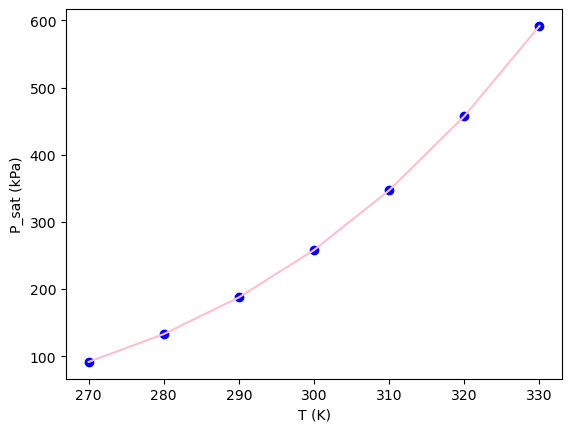

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy import stats


P= np.array([91.55, 132.97, 187.65, 258.11, 347.06, 457.31, 591.79])
T = np.array([270, 280, 290, 300, 310, 320, 330])

x1=1/T
x2=-np.log(P)/T
Y=np.matrix([np.log(P)]).T
print ('Y is equal to:', Y)
Z=np.matrix([np.ones(len(T)), x1,x2]).T
print ('Z is equal to:\n', Z)


a= np.linalg.inv(Z.T.dot(Z)).dot(Z.T).dot(Y)
Sr=(Y[0]-a[0]-a[1]*x1[0]-a[2]*x2[0])**2+(Y[1]-a[0]-a[1]*x1[1]-a[2]*x2[1])**2+(Y[2]-a[0]-a[1]*x1[2]-a[2]*x2[2])**2+(Y[3]-a[0]-a[1]*x1[3]-a[2]*x2[3])**2+(Y[4]-a[0]-a[1]*x1[4]-a[2]*x2[4])**2+(Y[5]-a[0]-a[1]*x1[5]-a[2]*x2[5])**2+(Y[6]-a[0]-a[1]*x1[6]-a[2]*x2[6])**2
print("\nSr is equal to:",'{0:2.4e}'.format(np.matrix.item(Sr)), '\n')
Syx=np.sqrt(Sr/(7-3))
print("Syx: ", Syx, '\n')

Zinv=np.linalg.inv(Z.T.dot(Z))

Sa0=np.sqrt(Zinv[0,0]*(Syx**2))
Sa1=np.sqrt(Zinv[1,1]*(Syx**2))
Sa2=np.sqrt(Zinv[2,2]*(Syx**2))
print("Sa0:", Sa0, '\n')
print("Sa1: ", Sa1, '\n')
print("Sa2: ",Sa2, '\n')


Tvalue=stats.t.ppf(1.-0.025, df=4) #from excel 
L_0='{0:2.4e}'.format(float(a[0]-Tvalue*Sa0))
U_0='{0:2.4e}'.format(float(a[0]+Tvalue*Sa0))
L_1='{0:2.4e}'.format(float(a[1]-Tvalue*Sa1))
U_1='{0:2.4e}'.format(float(a[1]+Tvalue*Sa1))
L_2='{0:2.4e}'.format(float(a[2]-Tvalue*Sa2))
U_2='{0:2.4e}'.format(float(a[2]+Tvalue*Sa2))

Table=[["Lower boundary (L)","Coefficient a","Upper boundary (U)"],[L_0,'{0:2.4e}'.format(float(a[0])),U_0],[L_1,'{0:2.4e}'.format(float(a[1])),U_1],[L_2,'{0:2.4e}'.format(float(a[2])),U_2]]
print(tabulate(Table))
A=float(a[0])
C=float(a[2])
B=float((A*C)-a[1])

print("Coefficients of Antoine equation:\n", "A =",'{0:2.4e}'.format(A),"\n","B =",'{0:2.4e}'.format(B),"\n","C =",'{0:2.4e}'.format(C))

    
y = np.exp(A-(B/(C+T)))
plt.figure(1)
plt.plot(T, y, color='pink')
plt.scatter(T, P, color='blue')
plt.xlabel('T (K)')
plt.ylabel('P_sat (kPa)')
plt.show()